## Mnist set cnn 

In [103]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [104]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [105]:
# 모델에 대한 input shape
input_shape = (28, 28, 1)
# 데이터에 대한 클래스 갯수 지정
num_classes = 10

In [106]:

inputs = layers.Input(shape = input_shape)

# Feature Extraction
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net) 

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

## Summary

In [107]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_30 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 32)        0 

In [108]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
hist = model.fit(train_x, train_y, 
                 batch_size=32, 
                 shuffle=True,
                epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 1324619.6595 - accuracy: 0.7964
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 38851943.6133 - accuracy: 0.9365
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 163674828.1663 - accuracy: 0.9487
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 646556174.9211 - accuracy: 0.9493
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 1138102761.9616 - accuracy: 0.9545


In [110]:
hist.history

{'loss': [4323099.5, 69853768.0, 273348192.0, 742915200.0, 1279323264.0],
 'accuracy': [0.8816166520118713,
  0.9387833476066589,
  0.9475833177566528,
  0.9525166749954224,
  0.9563500285148621]}

In [111]:
# evahitsate
model.evaluate(test_x, test_y, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 489370688.0000 - accuracy: 0.9846


[489370688.0, 0.9846000075340271]

In [112]:
test_image.shape

(1, 28, 28, 1)

In [113]:
pred = model.predict(test_image)

In [114]:
pred

array([[5.3631910e-39, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.5243549e-29, 0.0000000e+00, 2.5243549e-29,
        1.8664674e+08, 6.2058648e+22]], dtype=float32)

In [115]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28)

In [116]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [117]:
np.argmax(preds, -1)

array([8, 2, 0, 2, 2, 0, 6, 2, 4, 6, 0, 0, 8, 0, 1, 1, 8, 4, 2, 8, 0, 6,
       3, 9, 2, 2, 0, 0, 4, 0, 0, 6])

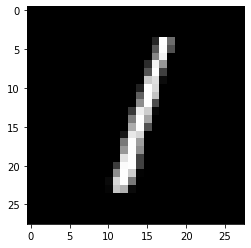

In [118]:
plt.imshow(test_batch[2, :, :], 'gray')
plt.show()